<a href="https://colab.research.google.com/github/l43lu/NLP_Project_Assignment/blob/master/03_Preprocessing_after_agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stopwordsiso

     |████████████████████████████████| 73 kB 1.7 MB/s 


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import unicodedata as unicode
import random
import stopwordsiso as stopwords

from numpy.random import randint

from IPython.display import display
from datetime import date, datetime, timedelta
pd.set_option("display.max_rows",180)

In [ ]:
import spacy
!python -m spacy download de
nlp = spacy.load('de')

     |████████████████████████████████| 14.9 MB 7.7 MB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-py3-none-any.whl size=14907055 sha256=f9e5f790fb1976bad0296b670833bcd9f30a88a251c782798e0700157650f81b
  Stored in directory: /tmp/pip-ephem-wheel-cache-gyzsldiw/wheels/00/66/69/cb6c921610087d2cab339062345098e30a5ceb665360e7b32a
Successfully built de-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/de_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/de
You can now load the model via spacy.load('de')


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## Load Data from Github

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP Project/Final/data/preprocessed_train_augmented.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP Project/Final/data/preprocessed_test.csv')

## Head insight train data

In [ ]:
train.drop(columns=['stemmed_text'], inplace=True)
test.drop(columns=['text'], inplace=True)

In [ ]:
test.rename(columns={"stemmed_text": "text"}, errors="raise", inplace=True)

In [ ]:
train.fillna('', inplace=True)

### Analyze Data Types



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sub     12283 non-null  object
 1   text    12282 non-null  object
dtypes: object(2)
memory usage: 192.0+ KB


In [ ]:
train.describe(include=object)

,sub,text
count,12283,12282
unique,9,12061
top,Inland,"""der standard erklärt wichtigsten begriffe sta..."
freq,1510,3


In [ ]:
train["sub"].value_counts()

Inland           1510
Wirtschaft       1510
Panorama         1510
Sport            1510
International    1510
Web              1510
Etat             1147
Kultur           1044
Wissenschaft     1032
Name: sub, dtype: int64

In [ ]:
train["sub"].describe()

count      12283
unique         9
top       Inland
freq        1510
Name: sub, dtype: object

In [ ]:
test.head()

,sub,text
0,Wirtschaft,der gewerkschaft gpa djp lanciert all in ...
1,Sport,franzosen verteidigen führung kritisch ...
2,Web,neu video designern netz runden schlagen...
3,Sport,jährig brasilianer spiele pausieren ents...
4,International,aufständisch verwenden chemikalie gefechten a...


## Visalisierung mit Bar Chart

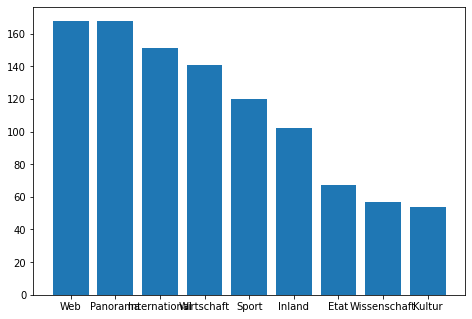

In [ ]:
# Test
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
value_count_test = test["sub"].value_counts()
news_type_list = list(value_count_test.index)
amount_list = list(value_count_test.values)
ax.bar(news_type_list,amount_list)
plt.show()

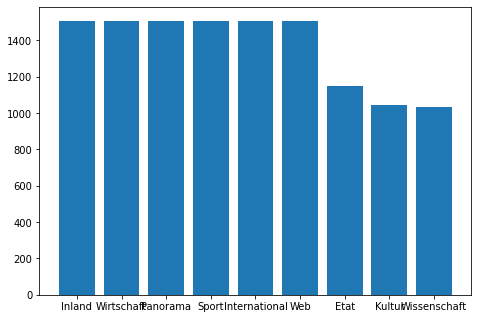

In [ ]:
# Train
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
value_count_train = train["sub"].value_counts()
news_type_list = list(value_count_train.index)
amount_list = list(value_count_train.values)
ax.bar(news_type_list,amount_list)
plt.show()

### Case normalization

Convert text to the same case

In [ ]:
def lower_case(string_):
    return string_.lower()

In [ ]:
#test['text'] = test['text'].apply(lower_case)
train['text'] = train['text'].apply(lower_case)

### Remove Stop Words

In [ ]:
de_sw = stopwords.stopwords('de')
def remove_stopwords(text):
    stopwords = list(de_sw)
    querywords = text.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    return result

In [ ]:
len(list(de_sw))

620

In [ ]:
train['text'] = train['text'].apply(remove_stopwords)
#test['text'] = test['text'].apply(remove_stopwords)

In [ ]:
train.head()

,sub,text
0,Sport,-jähriger fällt saisonende aus. wien – rapid s...
1,Kultur,"'erfundene bilder filmen, verloren gelten: ""th..."
2,Web,frischgekürte ceo sundar pichai setzt umgängli...
3,Wirtschaft,"putin: ""einigung, menge niveau jänner halten""...."
4,Inland,estland sieht künftigen österreichischen präsi...


### Remove Digits

In [ ]:
def remove_digits_from_string(_string):
    return ''.join([i for i in _string if not i.isdigit()])

In [ ]:
train['text'] = train['text'].apply(remove_digits_from_string)
#test['text'] = test['text'].apply(remove_digits_from_string)

### Remove non alphabetic characters from text

In [ ]:
#test['text'] = test['text'].str.replace('[^a-zA-ZäüöÄÜÖß]'," ")
train['text'] = train['text'].str.replace('[^a-zA-ZäüöÄÜÖß]'," ")

### Stemming

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def stemming(_string):
    words = nlp(_string)
    stemmed_string = ""
    for w in words:
        stemmed_string = stemmed_string+" "+w.lemma_
        
    return stemmed_string

In [ ]:
train['stemmed_text'] = train['text'].apply(stemming)

In [ ]:
#test['stemmed_text']  = test['text'].apply(stemming)

In [ ]:
train.iloc[4]['text']

'estland sieht künftigen österreichischen präsidenten estnischen staatsbürger  wien tallinn pskow   eltern künftigen bundespräsidenten sowjets besetzten estland damalige deutsche reich geflohen  wien sascha van bellen welt kam  estnische verwandte jubelten dienstag wahlsieg  freude herrscht politikern landes  interesse van bellen russischen stadt pskow  geburtsstadt eltern  ganzem herzen familie mitgefiebert  irina steinberg  cousine künftigen präsidenten  sonntag stress gewesen  erzählt steinberg telefonat apa  sieg zeugt davon  österreichische intelligenzija  denkenden menschen  sascha gestimmt haben  studierte philologin  dorf süden estlands lebt  freudig wahlsieg ehemaligen grünen chefs estnischen politikern kommentiert  wahl präsidenten estnischen wurzeln schafft günstige bedingungen engere zusammenarbeit estland österreich  erklärt vorsitzende außenpolitischen ausschusses estnischen parlament  sven mikser  estland aufschwung europaskeptischer kräfte sorge beobachte  froh  österre

In [ ]:
train.iloc[4]['stemmed_text']

' estland sehen künftig österreichisch präsidenten estnischen staatsbürger   wien tallinn pskow    eltern künftig bundespräsidenten sowjets besetzen estland damalige deutsch reichen fliehen   wien sascha van bellen welt kommen   estnische verwandt jubeln dienstag wahlsieg   freude herrschen politikern landes   interesse van bellen russisch stadt pskow   geburtsstadt eltern   ganz herzen familie mitgefiebert   irina steinberg   cousine künftig präsidenten   sonntag stress sein   erzählen steinberg telefonat apa   sieg zeugen davon   österreichisch intelligenzija   denkend menschen   sascha stimmen haben   studieren philologin   dorf süden estlands leben   freudig wahlsieg ehemalig grün chefs estnischen politikern kommentieren   wahl präsidenten estnischen wurzeln schaffen günstige bedingungen eng zusammenarbeit estland österreich   erklären vorsitzend außenpolitisch ausschusses estnischen parlament   sven mikser   estland aufschwung europaskeptischer kräfte sorge beobachten   froh   öst

In [ ]:
len(train.iloc[4]['text']), len(train.iloc[4]['stemmed_text'])

(3135, 3149)

In [ ]:
train.drop(columns=['text'], inplace=True)

In [ ]:
train.rename(columns={"stemmed_text": "text"}, errors="raise", inplace=True)

In [ ]:
# Weitere Wörter entfernen welche eigentlich Stopwords sind...
def remove_words(text):
    stopwords = ['werden', 'sein', 'haben', 'können']
    querywords = text.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    return result

In [ ]:
train['text'] = train['text'].apply(remove_words)

### Word Cloud Übersicht

In [ ]:
subs_list = list(train['sub'].unique())

Sport


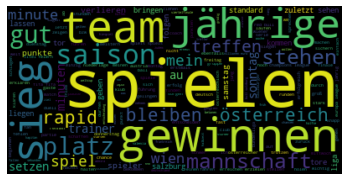

Kultur


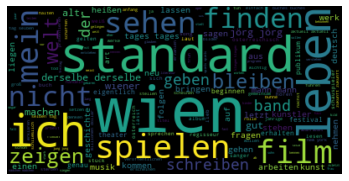

Web


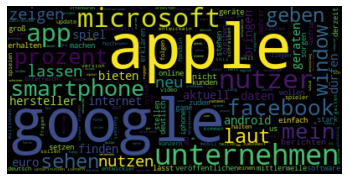

Wirtschaft


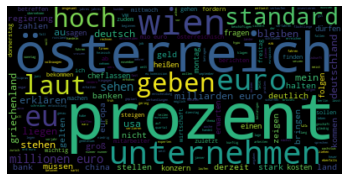

Inland


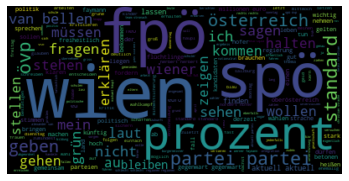

Etat


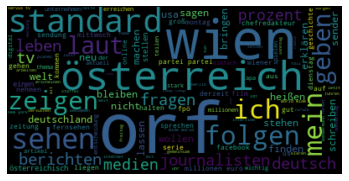

International


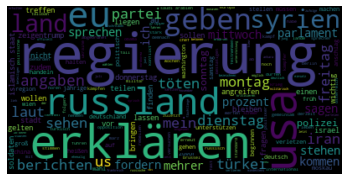

Panorama


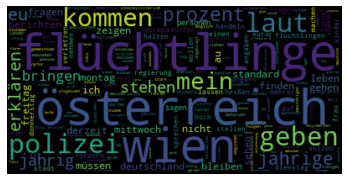

Wissenschaft


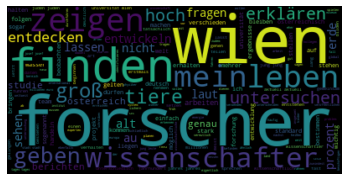

In [ ]:
for sub in subs_list:
  _tmp_df = train[train['sub'] == sub]
  print(sub)
  text      = " ".join(review for review in _tmp_df['text'].astype(str))
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()





### Save to CSV

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/NLP Project/Final/data/final_train.csv', 'w') as f:
  train.to_csv(f, sep=',', index=False) 

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/NLP Project/Final/data/final_test.csv', 'w') as f:
  test.to_csv(f, sep=',', index=False) 